In [93]:
import sys, time
import pandas as pd
import datetime as dt
from IPython.display import display

import plotly.plotly as py # interactive graphing
from plotly.graph_objs import Bar, Scatter, Marker, Layout

In [94]:
df_pl_215= pd.read_excel('pl_215.xlsx')

In [95]:
list(df_pl_215.columns.values)

['id_parlamentar', 'Parlamentar', 'Sigla', 'Partido', 'Voto', 'x', 'y']

In [96]:
df_pl_215

,id_parlamentar,Parlamentar,Sigla,Partido,Voto,x,y
0,0,CLELIA GOMES,70,AVANTE,---,1,70
1,1,ANDRE SOARES,27,DC,---,2,27
2,2,ALDO DEMARCHI,25,DEM,Obstrucao,3,25
3,3,EDMIR CHEDID,25,DEM,Obstrucao,4,25
4,4,ESTEVAM GALVAO,25,DEM,Sim,5,25
5,5,MILTON LEITE FILHO,25,DEM,Obstrucao,6,25
6,6,RODRIGO MORAES,25,DEM,Sim,7,25
7,7,ROGERIO NOGUEIRA,25,DEM,Sim,8,25
8,8,ITAMAR BORGES,15,MDB,Sim,9,15
9,9,JOOJI HATO,15,MDB,Licenciado,10,15


In [97]:
df = df_pl_215

In [21]:
#Utility functions
def progress(v):
    v = str(v)
    sys.stdout.flush()
    sys.stdout.write('\r')
    sys.stdout.flush()
    sys.stdout.write(v)

In [22]:
FILE_NAME = "pl_215.gml"

In [23]:
f = open(FILE_NAME, "w")
#helpers
s = " "
ss = s+s
sss = s+s+s
ssss = s+s+s+s
nl = "\n"

#loop helpers
added = []
ind = 0

#Root node
f.write("graph"+nl)
f.write("["+nl)

#Write an edge
def write_edge(r):
    f.write( ss + "edge" + nl)
    f.write( ss + "[" + nl)
    f.write( ssss + "source" + s + '"' + str(r['id_parlamentar']) + '"' + nl)
    f.write( ssss + "target" + s + '"' + str(r['Sigla']) + '"' + nl)
    f.write( ssss + "value" + s + '"' + str(r['Voto']) + '"' + nl)
    f.write( ss + "]"+ nl)

#Write a node
def write_node(r):
    f.write( ss + "node" + nl)
    f.write( ss + "[" + nl)
    f.write( ssss + "id" + s + '"' + str(r['id_parlamentar']) + '"' + nl)
    f.write( ssss + "label" + s + '"' + str(r['Parlamentar']) + '"' + nl)
    f.write( ssss + "x" + s + '"' + str(r['x']) + '"' + nl)
    f.write( ssss + "y" + s + '"' + str(r['y']) + '"' + nl)
    f.write( ss + "]"+ nl)


#Generate nodes
for i, r in df_pl_215.iterrows():
    #increment, as index not reliable
    ind += 1
    #Check for duplicates
    if (r['id_parlamentar'] not in added):
        #Add to list
        added.append(r['id_parlamentar'])
        added.append(r['x'])
        added.append(r['y'])
        write_node(r)
    #print the progress    
    progress(ind)

print(nl+"Printing nodes over")

#flush index
ind = 0    
#Generate edges    
for i, r in df_pl_215.iterrows():
    #increment, as index not reliable
    ind += 1
    if(r['id_parlamentar'] < r['Sigla']):
        write_edge(r)
    #print the progress            
    progress(ind)

print(nl+"Printing nodes and edges over")

#closing node
f.write("]"+nl)
f.close()

94
Printing nodes over
94
Printing nodes and edges over


# Data preparation

### Votação PL 215


In [98]:
column_edge = 'Voto'
column_ID = 'id_parlamentar'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [99]:
data_to_merge

,id_parlamentar,Voto,id_parlamentar_2
0,0,---,0
1,0,---,1
2,0,---,12
3,0,---,15
4,0,---,16
5,0,---,17
6,0,---,18
7,0,---,20
8,0,---,21
9,0,---,22


In [100]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [101]:
d

,id_parlamentar,id_parlamentar_2,Voto
1,0,1,---
2,0,12,---
3,0,15,---
4,0,16,---
5,0,17,---
6,0,18,---
7,0,20,---
8,0,21,---
9,0,22,---
10,0,23,---


In [102]:
import networkx as nx

G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.id_parlamentar.tolist())

In [103]:
G.nodes()

NodeView((0, 1, 12, 15, 16, 17, 18, 20, 21, 22, 23, 25, 32, 62, 85, 86, 87, 2, 3, 5, 11, 13, 28, 29, 33, 34, 38, 42, 43, 45, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 71, 72, 74, 76, 78, 80, 82, 83, 89, 93, 4, 6, 7, 8, 10, 14, 19, 24, 26, 27, 30, 31, 35, 37, 39, 40, 41, 44, 46, 54, 70, 73, 75, 79, 81, 88, 90, 91, 92, 9, 53, 36, 61, 68, 69, 77, 84))

### Partidos


In [105]:
column_edge = 'Partido'
column_ID = 'id_parlamentar'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]

d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [106]:
d


,id_parlamentar,id_parlamentar_2,Partido
3,2,3,DEM
4,2,4,DEM
5,2,5,DEM
6,2,6,DEM
7,2,7,DEM
10,3,4,DEM
11,3,5,DEM
12,3,6,DEM
13,3,7,DEM
17,4,5,DEM


In [107]:
# Create the connections in the graph
links_attributes = {tuple(row[[column_ID, column_ID+"_2"]]): {column_edge: row[column_edge]} for i,row in d.iterrows()}

G.add_edges_from(links_attributes) # create the connection, without attribute. Check it with G.get_edge_data(3,5)
nx.set_edge_attributes(G=G, values=links_attributes) # adds the attribute. Check it with G.get_edge_data(3,5)

# Graph analysis


### Drawing graphs

In [108]:
import matplotlib.pyplot as plt

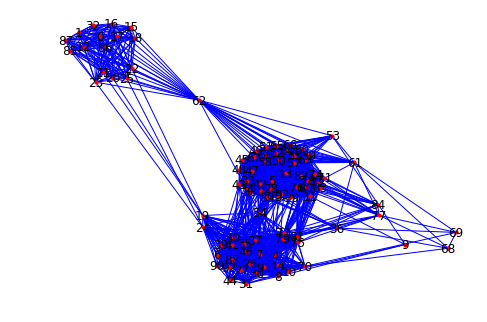

In [109]:
nx.draw(G, node_size=10,edge_color='b',edge_width=1,with_labels=True,node_label_position ='top center')


In [110]:
nx.write_gml(G, 'pl_215.gml')